##Step 1 : Downloading the dataset of chum_modelling(csv format)

##Step 2 : Importing the libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
file = pd.DataFrame(data)
file
file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
file['HasCrCard'] = file['HasCrCard'].astype('category')

In [5]:
file['IsActiveMember'] = file['IsActiveMember'].astype('category')
file['Exited'] = file['Exited'].astype('category')

In [6]:
file = file.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
#Removing the RowNumer,CustomerId and Surname column labels from the dataset

In [7]:
file.head()
#Displaying the data without first three columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##3.Performing the visualizations
 - Uni-variate Analysis
 - Bi-variate Analysis
 - Multi-variate Analysis





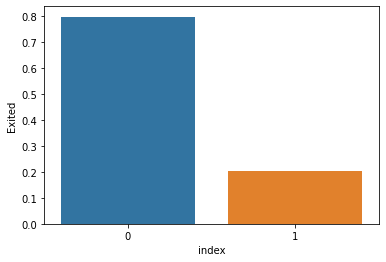

In [8]:
#Importing seabron library
import seaborn as sns
depth = file['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=depth,x='index',y='Exited')

In [9]:
depth

,index,Exited
0,0,0.7963
1,1,0.2037


From the above relation analysis, it can be said as the data is imbalanced
For to correct this, we are processing and visualizing the data using matplotlib libary below

In [10]:
import matplotlib.pyplot as plt

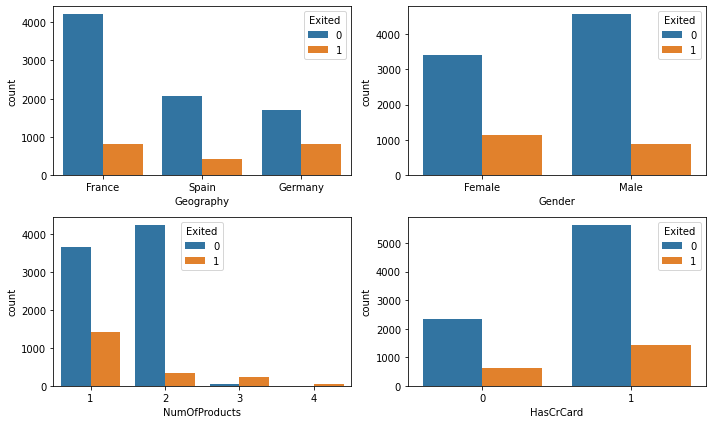

In [11]:
categorical = file.drop(columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'])
rows = int(np.ceil(categorical.shape[1] / 2)) - 1

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10,6))
axes = axes.flatten()

#Generating subplots
for row in range(rows):
    cols = min(2, categorical.shape[1] - row*2)
    for col in range(cols):
        col_name = categorical.columns[2 * row + col]
        ax = axes[row*2 + col]       

        sns.countplot(data=categorical, x=col_name, hue="Exited", ax=ax);
        
plt.tight_layout()

##4.Performing Descriptive Statistics method for to explain the features on the dataset

In [12]:
file.info()
#To print a concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(3), float64(2), int64(4), object(2)
memory usage: 654.8+ KB


In [13]:
file.describe()
#This function performs descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


##5. Handling and checking for any missing values

In [14]:
file.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The above result shows that there is no missing values in the dataset

In [15]:
for i in file:
  if file[i].dtype=='object' or file[i].dtype=='category':
    print("unique of "+i+" is "+str(len(set(file[i])))+" they are "+str(set(file[i])))

unique of Geography is 3 they are {'Germany', 'France', 'Spain'}
unique of Gender is 2 they are {'Female', 'Male'}
unique of HasCrCard is 2 they are {0, 1}
unique of IsActiveMember is 2 they are {0, 1}
unique of Exited is 2 they are {0, 1}


##6. Finding the outliers and replacing the outliers

In [16]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


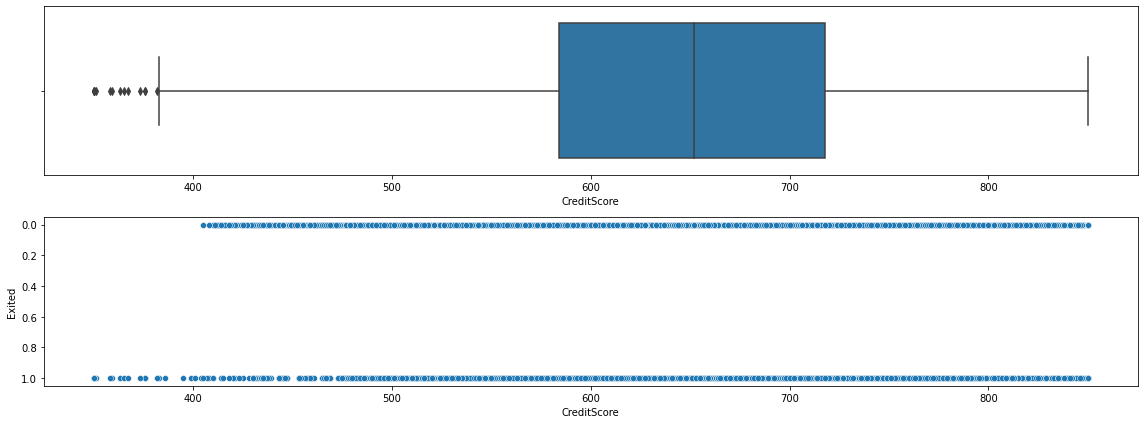

In [17]:
#Scatter and box plot
box_scatter(file,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['CreditScore'] < 400])}")

#19 outliers in the analysis view

# of Bivariate Outliers: 3


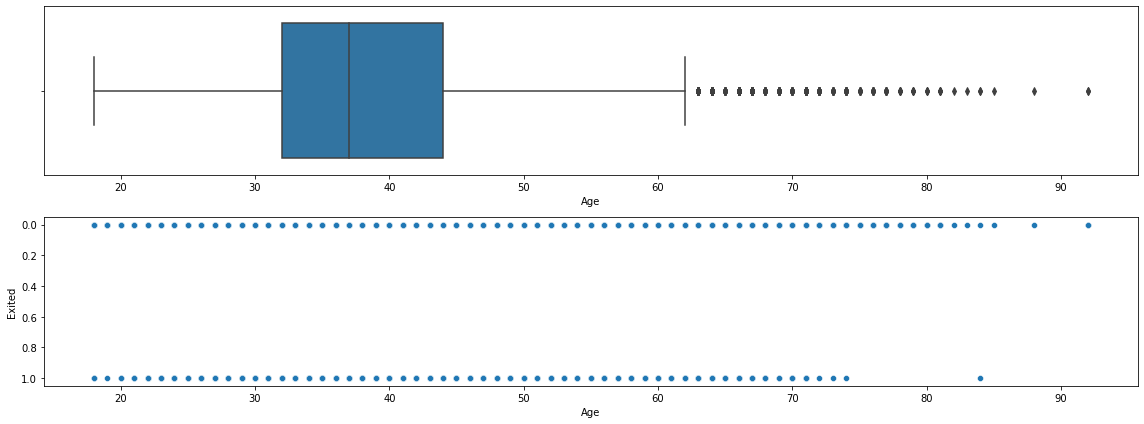

In [18]:
box_scatter(file,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['Age'] > 87])}")

#3 outliers in the above analysis view

# of Bivariate Outliers: 4


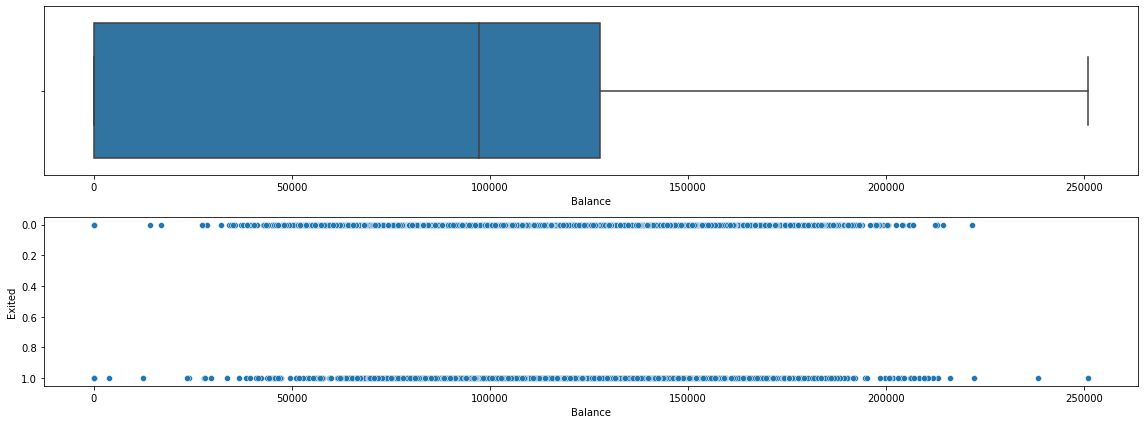

In [19]:
box_scatter(file,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['Balance'] > 220000])}")

We can see that there are four outliers above

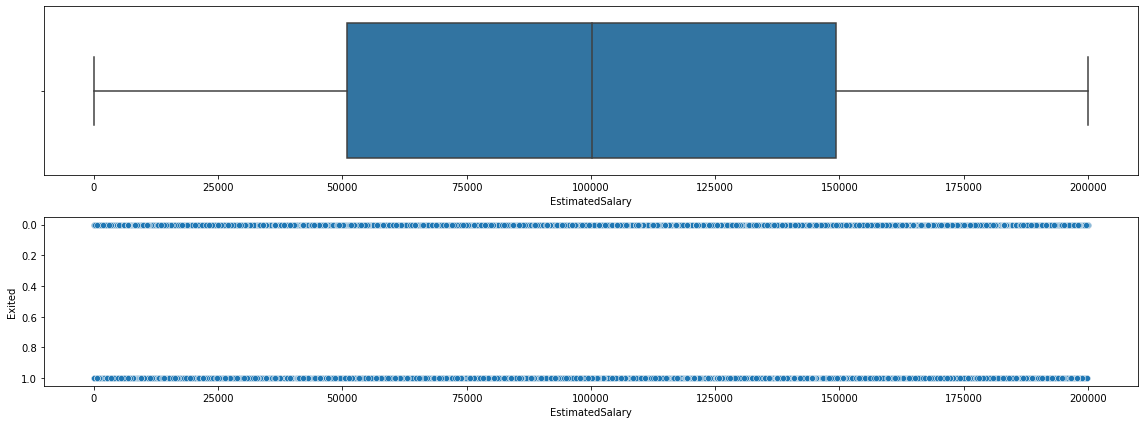

In [20]:
box_scatter(file,'EstimatedSalary','Exited');
plt.tight_layout()

### Removing the outliers

In [36]:
for i in file:
    if file[i].dtype=='int64' or file[i].dtypes=='float64':
        q1=file[i].quantile(0.25)
        q3=file[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        file[i]=np.where(file[i] >upper, upper, file[i])
        file[i]=np.where(file[i] <lower, lower, file[i])

# of Bivariate Outliers: 19


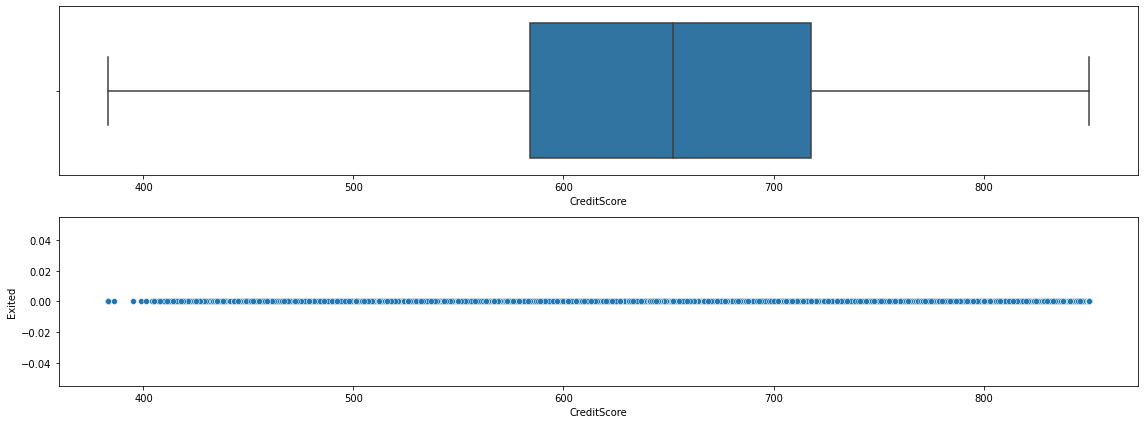

In [37]:
box_scatter(file,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['CreditScore'] < 400])}")

Removing the outliers

In [38]:
for i in file:
    if file[i].dtype=='int64' or file[i].dtypes=='float64':
        q1=file[i].quantile(0.25)
        q3=file[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        file[i]=np.where(file[i] >upper, upper, file[i])
        file[i]=np.where(file[i] <lower, lower, file[i])

##After removing outliers, boxplot can visualized as below

# of Bivariate Outliers: 19


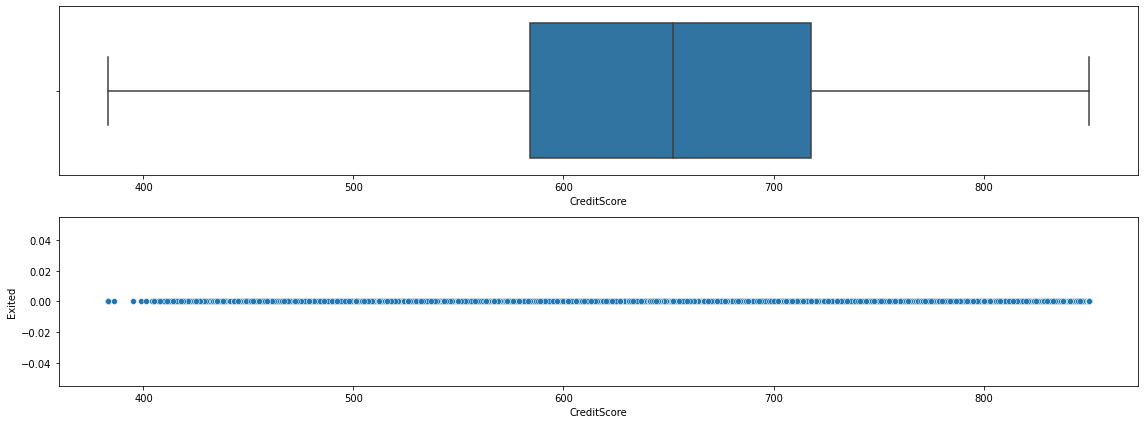

In [39]:
box_scatter(file,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['CreditScore'] < 400])}")

# of Bivariate Outliers: 0


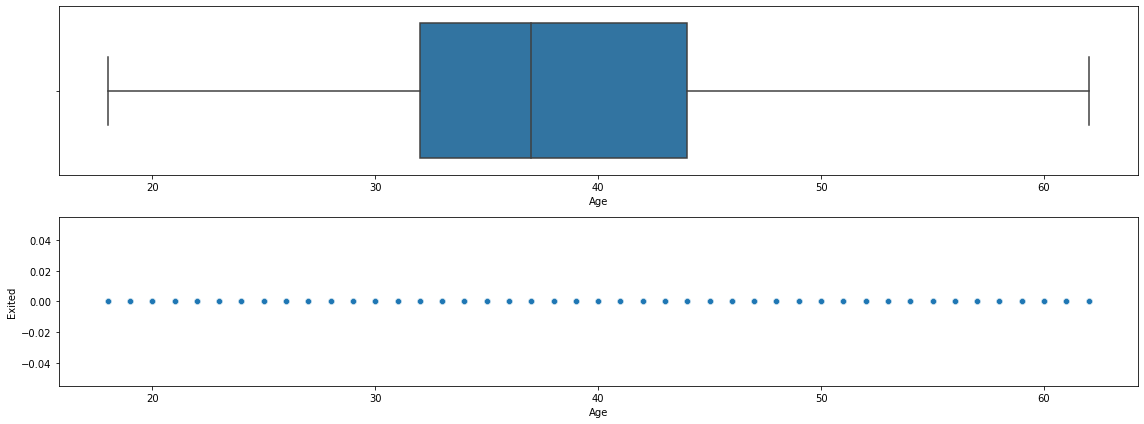

In [40]:
box_scatter(file,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['Age'] > 87])}")

# of Bivariate Outliers: 4


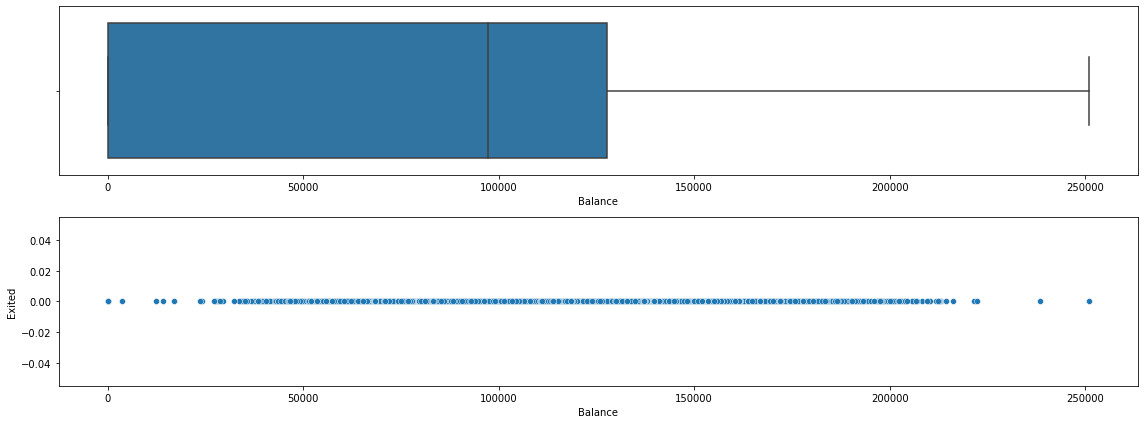

In [41]:
box_scatter(file,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(file.loc[file['Balance'] > 220000])}")

##7. Checking for categorical columns and performing label encoding
Label encoding is performed to convert the labels into numerical(binary digits) values

In [42]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in file:
    if file[i].dtype=='object' or file[i].dtype=='category':
        file[i]=encoder.fit_transform(file[i])

##8. Splitting the data into dependent and independent variables

In [43]:
x =  file.iloc[:,:-1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [44]:
y = file.iloc[:-1]
y.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


##9. Scaling the independent variables
It can done using StandardScaler from **sciket-learn** framework

In [45]:
from sklearn.preprocessing import StandardScaler
Scaling = StandardScaler()
x = Scaling.fit_transform(x)
x

array([[-0.32687761, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44080365,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53863634, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60524449, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25772996,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.4648682 , -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

##10. Splitting the data into training and testing

In [46]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(670, 2) (330, 2) (670,) (330,)


In [47]:
x_train.shape

(670, 2)

In [48]:
x_test.shape

(330, 2)

In [49]:
y_train.shape

(670,)

In [50]:
y_test.shape

(330,)